In [12]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt



In [13]:
# Ruta del archivo CSV
data_path = r"D:\CONTRATOS 2024\LEANDRO DOCUMENTOS\LEANDRO DOCUMENTOS\UNIVERSIDAD\SEXTO SEMESTRE\ANALISIS DE DATOS\TAREA 4\Mall_Customers.csv"

# Cargar los datos en un DataFrame
df = pd.read_csv(data_path)

# Ver las primeras filas del DataFrame para confirmar la carga
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [14]:
from sklearn.preprocessing import StandardScaler

# excluimos 'CustomerID' y cualquier columna no numérica
# se ajsuta estos nombres de columnas según el dataset
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_to_scale])

# Convertir de nuevo a DataFrame para facilitar operaciones posteriores
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

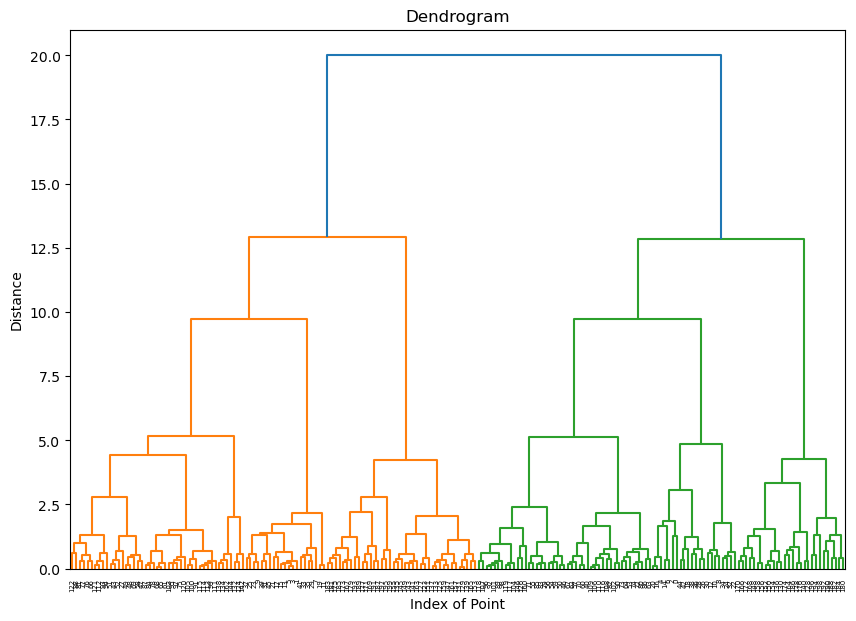

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar la matriz de enlaces
linked = linkage(df_scaled, method='ward')

# Dibujar el dendrograma
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df.index.to_list(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Index of Point')
plt.ylabel('Distance')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# cortamos el dendrograma para formar 5 clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linked, 5, criterion='maxclust')
df['Cluster'] = clusters

# Calcula las métricas de rendimiento
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(df_scaled, df['Cluster'])

print("Silhouette Score: ", silhouette_avg)
print("Calinski-Harabasz Score: ", calinski_harabasz)

Silhouette Score:  0.39002826186267214
Calinski-Harabasz Score:  107.82656032570377


In [21]:
df['Cluster'] = df['Cluster'].astype('category')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100) Cluster
0           1    Male   19                  15                      39       2
1           2    Male   21                  15                      81       5
2           3  Female   20                  16                       6       2
3           4  Female   23                  16                      77       5
4           5  Female   31                  17                      40       2


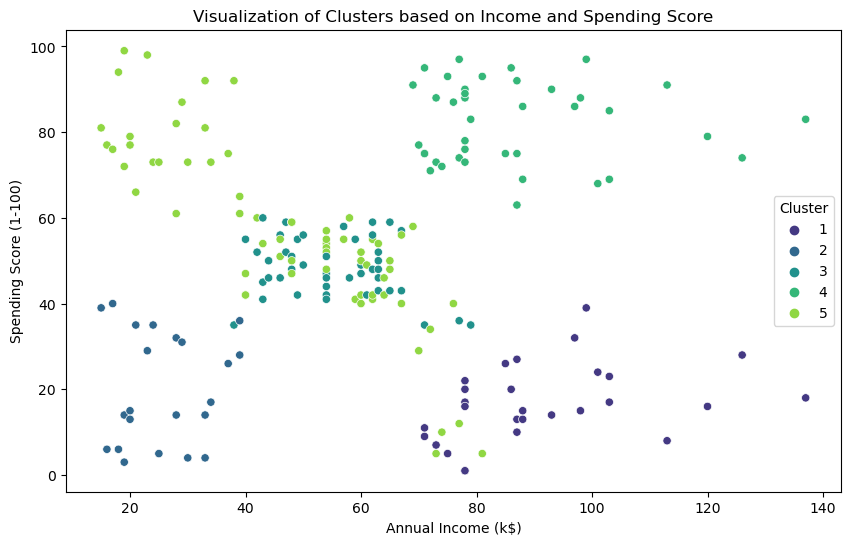

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('Visualization of Clusters based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

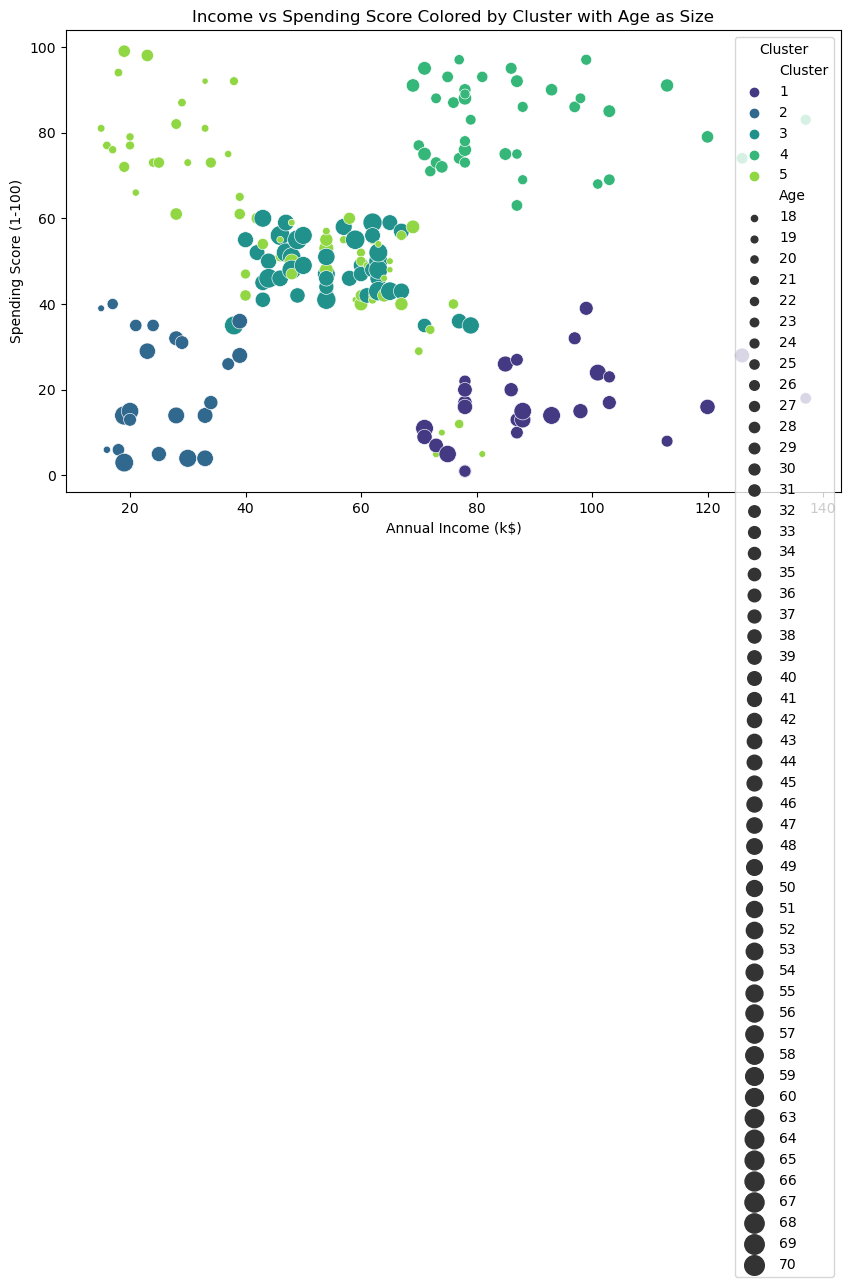

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'df' tiene columnas para 'Age' además de las ya utilizadas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', size='Age', hue='Cluster', data=df, palette='viridis', legend='full', sizes=(20, 200))
plt.title('Income vs Spending Score Colored by Cluster with Age as Size')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

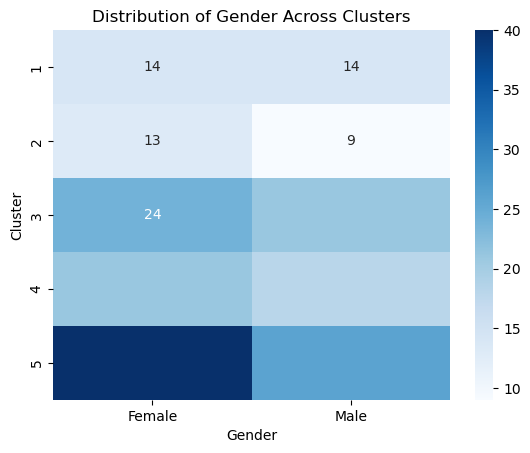

In [26]:
# Supongamos que has codificado 'Gender' y quieres ver cómo se distribuye por cluster
cluster_gender = pd.crosstab(df['Cluster'], df['Gender'])
sns.heatmap(cluster_gender, annot=True, cmap='Blues', fmt='d')
plt.title('Distribution of Gender Across Clusters')
plt.xlabel('Gender')
plt.ylabel('Cluster')
plt.show()

C:\Users\fabia\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


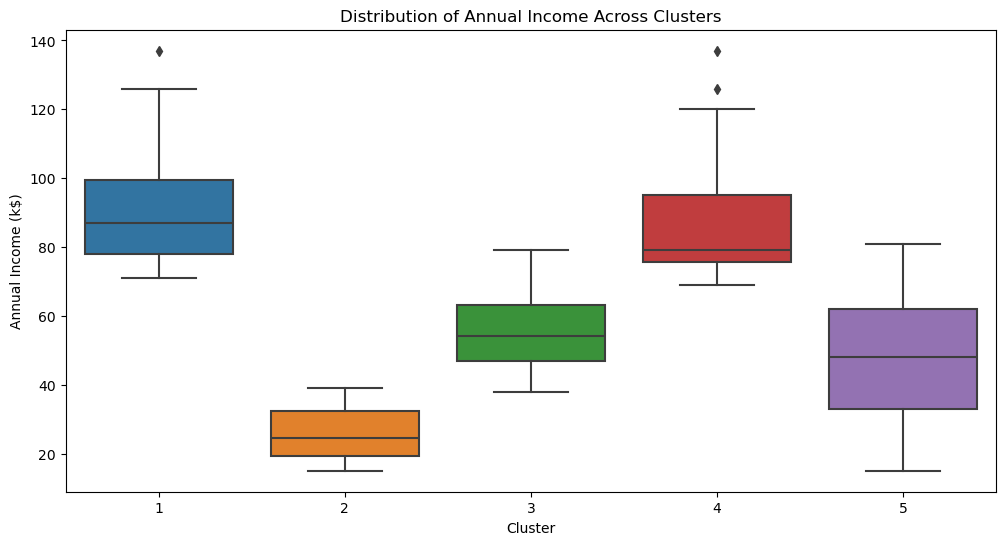

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Distribution of Annual Income Across Clusters')
plt.show()